<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Circuitos%20El%C3%A9tricos%20I%20-%20Semana%208.2%20-%20Circuitos%20RLC%20de%20segunda%20ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install -e .
    
import numpy as np
import sympy as sp
from circuit.utils import round_expr, symdisp, symplot, set_preferences

try:
    import scienceplots
except:
    ! pip install SciencePlots
    
import matplotlib.pyplot as plt
plt.style.use(['science'])
set_preferences()
#plt.rcParams["figure.figsize"] = (6,3.375)

In [227]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [228]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# *Circuitos Elétricos I - Semana 8*

# Circuitos de segunda ordem

## Circuito RLC em paralelo

<img src="./figures/J12C2.png?raw=1" width="800">

Simulação: https://tinyurl.com/ycnkjnot

### Aplicação das Leis de Kirchhoff 

Para determinar o comportamento de todas as grandezas elétricas no circuito RLC em paralelo, precisamos determinar uma  das correntes ($i_R$, $i_L$, $i_C$) ou a tensão $v$, que é a mesma para todos os elementos. Sem nenhuma razão particular, vamos escolher a corrente no indutor $i_L$ como sendo a nossa grandeza de interesse. Aplicando LKC, temos que:

$$\begin{align}
   i_R + i_L + i_C &= i_s\\
   \frac{v}{R} + i_L + C\frac{d v}{d t} &= i_s\nonumber\\
    \frac{1}{R}\left[L\frac{d i_L}{d t}\right] + i_L + C \frac{d}{d t}\left[L\frac{d i_L}{d t}\right]  &= i_s\nonumber\\
    \frac{d^{2} i_L}{d t^{2}}+\frac{1}{RC} \frac{d i_L}{d t}+\frac{1}{L C} i_L &=\frac{i_s}{LC}
   \end{align}
$$

Fazendo a substituição de variáveis $\alpha = \frac{1}{2RC}$ e $\omega_0 = \frac{1}{\sqrt{LC}}$,  podemos reescrever a equação de $i_L$ na forma

$$ 
\begin{equation}\label{EDO1} 
\frac{d^{2} i_L}{d t^{2}}+2\alpha \frac{d i_L}{d t}+\omega_0^2 i_L=i_{\mathrm{s}}\omega_0^2 
\end{equation} 
$$

A equação (\ref{EDO1}) é uma EDO de segunda ordem não-homogênea, linear e de coeficientes constantes. Considere a solução da EDO homogênea associada a (\ref{EDO1}), ou seja, assuma que $i_s=0$. Para essa classe de EDOs homogêneas, as soluções serão funções exponenciais do tipo $i_L(t)=Ae^{st}$

$$ 
\begin{align} 
\frac{d^{2} (Ae^{st})}{d t^{2}}+2\alpha \frac{d (Ae^{st})}{d t}+\omega_0^2 Ae^{st} &=0\\
Ae^{st}(s^2+2\alpha s + \omega_0^2) &=0.
\end{align} 
$$

Dessa forma, $i_L(t)=Ae^{st}$ só é solução da EDO homogênea se

$$
\begin{equation}\label{soluc}
s^2+2\alpha s + \omega_0^2=0
\end{equation} 
$$

e (\ref{soluc}) é conhecida como equação característica associada à EDO, cujas raízes são dadas por:

$$
\begin{align}
s_1 &=-\alpha +\sqrt{\alpha^2-\omega_0^2}\\
s_2 &=-\alpha -\sqrt{\alpha^2-\omega_0^2}
\end{align}
$$

Logo, a solução geral da EDO (\ref{EDO1}) pode ser escrita como

$$ \begin{equation} i_L(t) =A_{1} e^{s_{1}t}+A_{2} e^{s_{2}t}+i_{L}(t)_{particular} \end{equation}$$

em que $A_{1}$ e $A_{2}$ são constantes a serem determinadas e $i_{L}(t)_{particular}$ é uma solução particular para a EDO (\ref{EDO1}), que corresponde à solução de regime estacionário, ou seja, $i_{L}(t)_{particular} = \lim_{t\to \infty} i_L(t)$. No caso de circuitos de corrente contínua, $i_{L}(t)_{particular}$ é uma função constante sempre que a corrente no indutor tender a se estabilizar num valor constante.

### Resposta total 

A resposta transiente de circuitos RLC em paralelo, seja ela natural ($i_L(\infty)=0$) ou ao degrau ($i_L(\infty)=i_s$), pode ser classificada nos três casos seguintes. Em todos os casos, assume-se que o transiente teve início no instante $t_0$ (instante do chaveamento) e que imediatamente após a ocorrência do chaveamento são conhecidos a corrente no indutor $i_L(t_0^+)$ e a tensão sobre o capacitor $v_C(t_0^+)$.

#### Caso superamortecido ($\alpha>\omega_0\Rightarrow \text{raízes reais e distintas}$):

Solução geral da EDO:

$$ \begin{equation} i_L(t) =A_{1} e^{s_{1} (t-t_0)}+A_{2} e^{s_{2} (t-t_0)}+i_L(\infty) \end{equation}$$

Condições iniciais para $i_L(t)$:

$$
\begin{align}
i_L(t_0^+) &=A_1 + A_2 + i_L(\infty)\\
\frac{di_L(t_0^+)}{dt} &=s_1A_1 + s_2A_2 = \frac{1}{L} v_C(t_0^+)
\end{align}
$$

Solução do sistema em $A_1$ e $A_2$:

$$
\begin{align}
A_{1} &=\frac{\frac{1}{L} v_C(t_0^+)-s_{2}\left[i_L(t_0^+)-i_L(\infty)\right]}{s_{1}-s_{2}} \\
A_{2} &=\frac{-\frac{1}{L} v_C(t_0^+)+s_{1}\left[i_L(t_0^+)-i_L(\infty)\right]}{s_{1}-s_{2}}
\end{align}
$$

#### Caso subamortecido ($ \alpha<\omega_0\Rightarrow\text{raízes complexas e conjugadas} $):

Fazendo $\omega_d = \sqrt{\omega_0^2-\alpha^2}$ temos $s_1 = -\alpha +j\omega_d$ e $s_2 = -\alpha -j\omega_d$.

Solução geral da EDO:

$$\begin{equation} i_L(t) = e^{-\alpha(t-t_0)}\left\lbrace B_{1}\cos[\omega_d (t-t_0)] + B_{2}\sin[\omega_d (t-t_0)]  \right\rbrace + i_L(\infty) \end{equation}$$

Condições iniciais para $i_L(t)$:

$$
\begin{align}
i_L(t_0^+) &=B_1 + i_L(\infty)\\
\frac{di_L(t_0^+)}{dt} &= -\alpha B_1 +\omega_d B_2 = \frac{1}{L} v_C(t_0^+)
\end{align}
$$

Solução do sistema em $B_1$ e $B_2$:

$$
\begin{align}
B_{1} &=i_L(t_0^+)-i_L(\infty) \\
B_{2} &=\frac{\frac{1}{L} v_C(t_0^+)+\alpha\left[i_L(t_0^+)-i_L(\infty)\right]}{\omega_d}
\end{align}
$$

#### Caso criticamente amortecido ($\alpha=\omega_0\Rightarrow \text{raízes reais e idênticas } s_1=s_2=-\alpha$):

Solução geral da EDO:

$$ \begin{equation} i_L(t) =D_{1} e^{-\alpha(t-t_0)}+D_{2}(t-t_0) e^{-\alpha(t-t_0)}+i_L(\infty) \end{equation}$$

Condições iniciais para $i_L(t)$:

$$
\begin{align}
i_L(t_0^+) &=D_1 + i_L(\infty)\\
\frac{di_L(t_0^+)}{dt} &=-\alpha D_1 + D_2 = \frac{1}{L} v_C(t_0^+)
\end{align}
$$

Solução do sistema em $D_1$ e $D_2$:

$$
\begin{align}
D_{1} &=i_L(t_0^+)-i_L(\infty) \\
D_{2} &= \frac{1}{L} v_C(t_0^+)+\alpha\left[i_L(t_0^+)-i_L(\infty)\right]
\end{align}
$$

### Gráficos das respostas

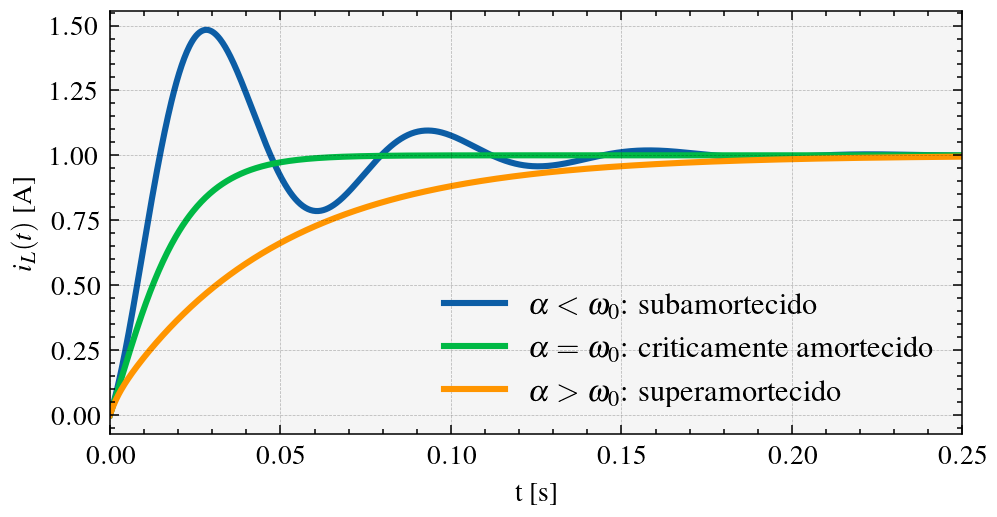

In [229]:
from math import isclose

def RLCpar(R, L, C, vC_0, iL_0, iL_inf, t):    
    α = 1/(2*R*C)
    ω0 = 1/np.sqrt(L*C)

    if isclose(α, ω0, abs_tol=1e-6):
        D1 = iL_0 - iL_inf 
        D2 = (1/L)*vC_0 + α*(iL_0 - iL_inf)        
        iL = D1*np.exp(-α*t) + D2*t*np.exp(-α*t) + iL_inf
        case = '$\\alpha = \\omega_0$: criticamente amortecido'
    else:
        s1 = -α + np.sqrt(α**2 - ω0**2 + 1j*0)
        s2 = -α - np.sqrt(α**2 - ω0**2 + 1j*0)
        
        A1 = ( (1/L)*vC_0 - s2*(iL_0 - iL_inf) )/(s1 - s2)
        A2 = (-(1/L)*vC_0 + s1*(iL_0 - iL_inf) )/(s1 - s2)
        
        iL = A1*np.exp(s1*t) + A2*np.exp(s2*t) + iL_inf
        iL = np.real(iL)
        
        if α > ω0:
            case = '$\\alpha > \\omega_0$: superamortecido'
        else:
            case = '$\\alpha < \\omega_0$: subamortecido'       
        
    iL_env = iL_inf + (iL_0 - iL_inf)*np.exp(-α*t)
        
    return iL, iL_env, case
 

C = 400e-6
L = 250e-3
vC_0 = 10
iL_0 = 0
iL_inf = 1

t = np.linspace(0, 0.25, 1000)

plt.figure(figsize=(5,2.5))
for R in [50, 12.5, 5]:
    iL, iL_env, case = RLCpar(R, L, C, vC_0, iL_0, iL_inf, t)
    plt.plot(t, iL,'-', label=case, linewidth = 2)    

plt.xlim(min(t), max(t))
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('$i_L(t)$ [A]');
plt.legend(loc='lower right');

### As várias maneiras de resolver o circuito RLC em paralelo

Na tabela a seguir, temos listadas as equações diferenciais para todas as grandezas de tensão e corrente do circuito. Perceba que a forma da EDO homogênea é a mesma em todos os casos, o que implica que todas as soluções terão comportamentos similares, mudando apenas as condições iniciais de cada grandezas.

$$
\begin{array}{|c|c|c|}
\hline \\
\text{Grandeza} & \text{EDO} & \text{Tipo}  & \text{Condições iniciais extraídas do circuito}\\
\hline
v(t) = v_R(t) = v_L(t) = v_C(t) & \frac{d^2 v}{d t^2}+2 \alpha \frac{d v}{d t}+\omega_0^2 v= 0 & \text{homogênea} & v(t_0^+) = v_C(t_0^+),\; \frac{dv(t_0^+)}{dt} = \frac{i_s}{C}-\frac{v_C(t_0^+)}{RC}-\frac{i_L(t_0^+)}{C} \\
\hline
i_R(t) & \frac{d^2 i_R}{d t^2}+2 \alpha \frac{d i_R}{d t}+\omega_0^2 i_R = 0 & \text{homogênea} & i_R(t_0^+) = \frac{v_C(t_0^+)}{R},\; \frac{di_R(t_0^+)}{dt} = \frac{1}{RC}[i_s - i_L(t_0^+) - \frac{v_C(t_0^+)}{R}] \\
\hline
i_C(t) & \frac{d^2 i_C}{d t^2}+2 \alpha \frac{d i_C}{d t}+\omega_0^2 i_C = 0 & \text{homogênea}& i_C(t_0^+) = i_s-\frac{v_C(t_0^+)}{R}-i_L(t_0^+),\; \frac{di_C(t_0^+)}{dt} = -\frac{v_C(t_0^+)}{L}-\frac{di_R(t_0^+)}{dt} \\
\hline
i_L(t) & \frac{d^2 i_L}{d t^2}+2 \alpha \frac{d i_L}{d t}+\omega_0^2 i_L=i_{\mathrm{s}} \omega_0^2 & \text{não-homogênea}& i_L(t_0^+) = i_L(t_0^+),\; \frac{di_L(t_0^+)}{dt} = \frac{v_C(t_0^+)}{L}\\
\hline
\end{array}
$$

Uma vez que a EDO para $i_L(t)$ é a que apresenta as expressões mais simples para as condições iniciais, resolver circuitos RLC em paralelo tende a ser menos trabalhoso se buscarmos determinar sua solução a partir da corrente no indutor.

### Problema 1

Para o circuito a seguir, as chaves $ch1$ e $ch2$ estiveram abertas por um longo intervalo de tempo. 

<img src="./figures/J12C3.png?raw=1" width="700">


a. Considerando que apenas $ch1$ fecha em $t_0=0$s, determine a tensão sobre o capacitor $v_C(t)$ para $t\geq 0^+$.\
b. Qual o máximo valor (absoluto) atingido pela tensão aplicada aos terminais do capacitor para $t\geq 0^+$? Em que instante ele ocorre?\
c. Considerando que apenas $ch2$ fecha em $t_0=0$s, determine a tensão sobre o capacitor $v_C(t)$ para $t\geq 0^+$.

Link para a simulação do circuito: https://tinyurl.com/yf8pj57t

### Resolvendo o problema com o Python

**Resolução item (a):**

**Calcula $\alpha$ e $\omega_0$**

In [230]:
# Parâmetros do circuito:
R = 1.64
L = 6e-3
C = 0.5e-3

# calculando α e ω0
α  = 1/(2*R*C)       # Frequência de Neper do circuito RLC em paralelo
ω0 = 1/np.sqrt(L*C)  # Frequência de ressonância do circuito RLC

symdisp('α =', round(α, 2), ' rad/s')
symdisp('ω_0 =', round(ω0, 2), ' rad/s')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Define os valores iniciais $v_c(t_0^+)$ e $i_L(t_0^+)$ e o valor final $i_L(\infty)$ (obtidos da análise do circuito)**

In [231]:
# informações obtidas pela análise do circuito

t0 = 0 # instante do chaveamento

iL_inf = -4 # valor final da corrente no indutor
iL_t0 = 2   # valor inicial da corrente no indutor
vc_t0 = 0   # valor inicial da tensão no capcitor

**Calcula as raízes da equação característica $s_1$ e $s_2$**

In [232]:
# raízes da equação característica
s1 = -α + np.sqrt(α**2-ω0**2)
s2 = -α - np.sqrt(α**2-ω0**2)

print('Raízes da equação característica:')
symdisp('s_1 =', round(s1, 2), ' rad/s')
symdisp('s_2 =', round(s2, 2), ' rad/s')

# define variáveis da solução geral
t, A1, A2 = sp.symbols('t, A1, A2')

# expressão geral da resposta superamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

print('Forma geral da solução:')
symdisp('i_L(t) = ', round_expr(iL,2), 'A')

Raízes da equação característica:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Forma geral da solução:


<IPython.core.display.Math object>

**Resolve o sistema de equações para determinação das constantes $A_1$ e $A_2$**

In [233]:
# define os sistema de equações com as condições iniciais
eq1 = sp.Eq(   A1 +    A2 + iL_inf, iL_t0)             
eq2 = sp.Eq(s1*A1 + s2*A2,        vc_t0/L)  

print('Sistema de equações:')
symdisp('(I): ', round_expr(eq1, 2),' ')
symdisp('(II): ', round_expr(eq2, 2),' ')

Sistema de equações:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [234]:
# resolve o sistema
soluc = sp.solve((eq1, eq2), dict=True)
soluc = soluc[0]

A1 = soluc[A1]
A2 = soluc[A2]

print('Solução do sistema:')
symdisp('A_1 =', round(A1, 2), ' A')
symdisp('A_2 =', round(A2, 2), ' A')

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Determina a expressão final para $i_L(t)$**

In [235]:
# expressão geral da resposta subamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

symdisp('i_L(t) = ', round_expr(iL,2), 'A')

<IPython.core.display.Math object>

**Plota gráfico de $i_L(t)$**

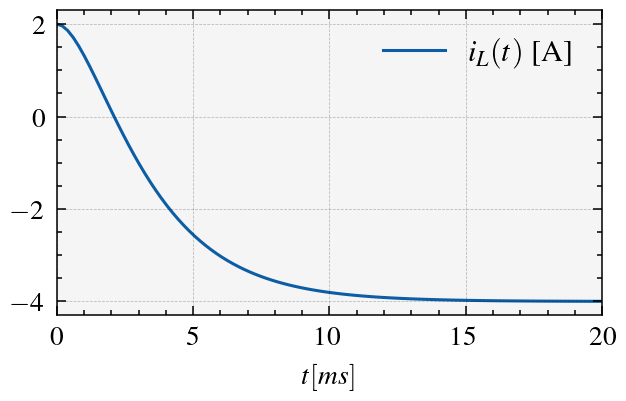

In [236]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.02,100)
symplot(t, iL, intervalo, '$i_L(t)$ [A]',xlabel='t [ms]', xfactor=1e-3)

**Determina $v_C(t)$ a partir de $i_L(t)$**

In [237]:
# tensão aplicada sobre o capacitor (= tensão sobre o indutor)
vC = L*sp.diff(iL, t)

symdisp('v_C(t) = ', round_expr(vC, 2), ' V')

<IPython.core.display.Math object>

**Plota gráfico de $v_C(t)$**

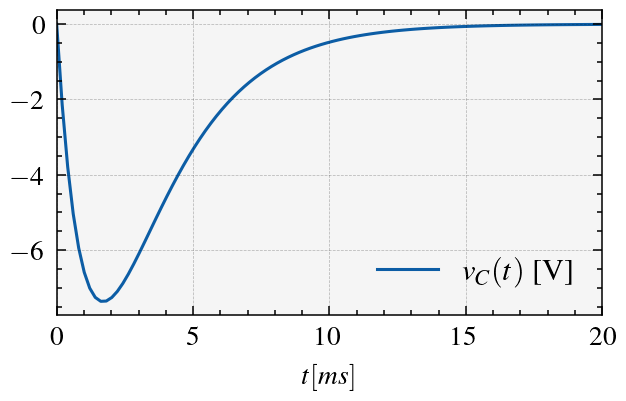

In [238]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.02,100)
symplot(t, vC, intervalo, '$v_C(t)$ [V]', xlabel='t [ms]', xfactor=1e-3)

**Resolução item (b):**

$$\frac{dv_C}{dt} = 0$$

In [239]:
# define a equação dvC/dt = 0
eq1 = sp.Eq(sp.diff(vC, t),0)  

round_expr(eq1, 2)

Eq(-24653.1*exp(-805.89*t) + 12653.1*exp(-413.62*t), 0)

In [240]:
# resolve a equação em t
ts = sp.solveset(eq1, t).args[0]

# calcula o valor de vC(t) para t = ts
vC_ts = vC.evalf(subs={t:ts})

symdisp('t_s = ', round(ts*1000,2), 'ms')
symdisp('v_C(t_s) = ', round(vC_ts,2), 'V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Resolução item (c):**

In [241]:
# Parâmetros do circuito:
R = 6
L = 6e-3
C = 0.5e-3

# calculando α e ω0
α  = 1/(2*R*C)       # Frequência de Neper do circuito RLC em paralelo
ω0 = 1/np.sqrt(L*C)  # Frequência de ressonância do circuito RLC

symdisp('α =', round(α, 2), ' rad/s')
symdisp('ω_0 =', round(ω0, 2), ' rad/s')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [242]:
# informações obtidas pela análise do circuito
iL_inf = 0  # valor final da corrente no indutor
iL_t0 = 2   # valor inicial da corrente no indutor
vc_t0 = 0   # valor inicial da tensão no capcitor

t0 = 0 # instante do chaveamento

In [243]:
# define a frequência de oscilação amortecida
ωd = np.sqrt(ω0**2 - α**2)

print('Frequência de oscilação amortercida:')
symdisp('ω_d =', round(ωd, 2), ' rad/s')

# define variáveis da solução geral
t, B1, B2 = sp.symbols('t, B1, B2')

# expressão geral da resposta subamortecida
iL = sp.exp(-α*(t-t0))*(B1*sp.cos(ωd*(t-t0)) + B2*sp.sin(ωd*(t-t0))) + iL_inf

print('Forma geral da solução:')
symdisp('i_L(t) = ', round_expr(iL,2), ' A')

Frequência de oscilação amortercida:


<IPython.core.display.Math object>

Forma geral da solução:


<IPython.core.display.Math object>

In [244]:
# define os sistema de equações com as condições iniciais
eq1 = sp.Eq(   B1 + iL_inf, iL_t0)             
eq2 = sp.Eq(-α*B1 + ωd*B2,  vc_t0/L)  

print('Sistema de equações:')
symdisp('(I): ', round_expr(eq1, 2),' ')
symdisp('(II): ', round_expr(eq2, 2),' ')

Sistema de equações:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [245]:
# resolve o sistema
soluc = sp.solve((eq1, eq2), dict=True)
soluc = soluc[0]

B1 = soluc[B1]
B2 = soluc[B2]

print('Solução do sistema:')
symdisp('B_1 =', round(B1, 2), ' A')
symdisp('B_2 =', round(B2, 2), ' A')

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [246]:
# expressão geral da resposta subamortecida
iL = sp.exp(-α*(t-t0))*(B1*sp.cos(ωd*(t-t0))+B2*sp.sin(ωd*(t-t0))) + iL_inf

symdisp('i_L(t) = ', round_expr(iL,2), 'A')

<IPython.core.display.Math object>

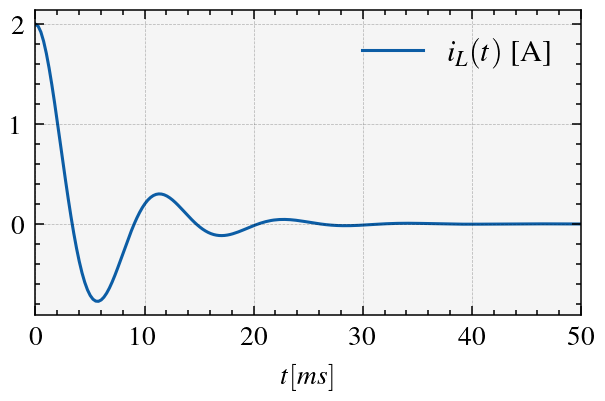

In [247]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.05,200)
symplot(t, iL, intervalo, '$i_L(t)$ [A]', xlabel='t [ms]', xfactor=1e-3)

In [248]:
# tensão aplicada sobre o capacitor (= tensão sobre o indutor)
vC = L*sp.diff(iL, t)
vC = sp.simplify(vC)

symdisp('v_C(t) = ', round_expr(vC, 2), ' V')

<IPython.core.display.Math object>

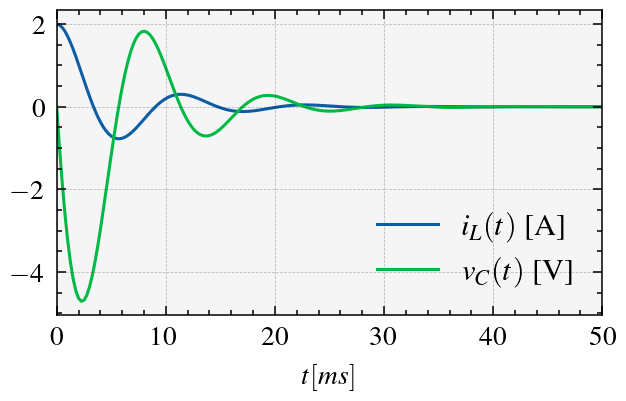

In [249]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.05,200)
symplot(t, vC, intervalo, '$v_C(t)$ [V]')
symplot(t, [iL, vC], intervalo, ['$i_L(t)$ [A]', '$v_C(t)$ [V]'], xlabel='t [ms]', xfactor=1e-3)

## Circuito RLC em série

<img src="./figures/J12C1.png?raw=1" width="800">

### Aplicação das Leis de Kirchhoff 

$$\begin{align}
   v_R + v_L + v_C &= v_s\\
   R i + L\frac{d i}{dt}+v_C &= v_s\nonumber\\
   R\left[C\frac{dv_C}{dt}\right] + L\frac{d}{dt}\left[C\frac{dv_C}{dt} \right] + v_C &= v_s\nonumber\\
    \frac{d^{2} v_{\mathrm{C}}}{d t^{2}}+\frac{R}{L} \frac{d v_{\mathrm{C}}}{d t}+\frac{1}{L C}   v_{\mathrm{C}} &=\frac{v_{\mathrm{s}}}{LC}
   \end{align} 
$$

com $ \alpha = \frac{R}{2L}$ e $\omega_0 = \frac{1}{\sqrt{LC}}$, temos

$$ \begin{equation}\label{EDO2} \frac{d^{2} v_{\mathrm{C}}}{d t^{2}}+2\alpha \frac{d v_{\mathrm{C}}}{d t}+\omega_0^2 v_{\mathrm{C}}=v_{\mathrm{s}}\omega_0^2 \end{equation} $$

A equação \ref{EDO2} é uma EDO de segunda ordem, linear e de coeficientes constantes.

Equação característica:

$$\begin{equation} s^2+2\alpha s + \omega_0^2=0 \end{equation}$$

Raízes da equação característica:

$$
\begin{align}
s_1 &=-\alpha +\sqrt{\alpha^2-\omega_0^2}\\
s_2 &=-\alpha -\sqrt{\alpha^2-\omega_0^2}
\end{align}
$$

### Resposta total 

A resposta transiente de circuitos RLC em série, seja ela natural ($v_C(\infty)=0$) ou ao degrau ($v_C(\infty)=v_s$), pode ser classificada nas três casos seguintes. Em todos os casos, assume-se que o transiente teve início no instante $t_0$ (instante do chaveamento).

#### Caso superamortecido ($\alpha>\omega_0\Rightarrow \text{raízes reais e distintas}$):

Solução geral da EDO:

$$\begin{equation} v_{\mathrm{C}}(t) =A_{1} e^{s_{1} (t-t_0)}+A_{2} e^{s_{2} (t-t_0)}+v_{\mathrm{C}}(\infty) \end{equation}$$

Condições iniciais para $v_{\mathrm{C}}(t)$:

$$
\begin{align}
v_{\mathrm{C}}(t_0^+) &=A_1 + A_2 + v_{\mathrm{C}}(\infty)\\
\frac{dv_{\mathrm{C}}(t_0^+)}{dt} &=s_1A_1 + s_2A_2 = \frac{1}{C} i_{\mathrm{L}}(t_0^+)
\end{align}
$$

Solução do sistema em $A_1$ e $A_2$:

$$
\begin{align}
A_{1} &=\frac{\frac{1}{C} i_{\mathrm{L}}(t_0^+)-s_{2}\left[v_{\mathrm{C}}(t_0^+)-v_{\mathrm{C}}(\infty)\right]}{s_{1}-s_{2}} \\
A_{2} &=\frac{-\frac{1}{C} i_{\mathrm{L}}(t_0^+)+s_{1}\left[v_{\mathrm{C}}(t_0^+)-v_{\mathrm{C}}(\infty)\right]}{s_{1}-s_{2}}
\end{align}
$$

#### Caso subamortecido ($\alpha<\omega_0\Rightarrow \text{raízes complexas e conjugadas}$):

Fazendo $\omega_d = \sqrt{\omega_0^2-\alpha^2}$ temos $s_1 = -\alpha +j\omega_d$ e $s_2 = -\alpha -j\omega_d$.

Solução geral da EDO:

$$\begin{equation} v_{\mathrm{C}}(t) = e^{-\alpha(t-t_0)}\left\lbrace B_{1}\cos[\omega_d (t-t_0)] + B_{2}\sin[\omega_d (t-t_0)]  \right\rbrace + v_{\mathrm{C}}(\infty) \end{equation}$$

Condições iniciais para $v_{\mathrm{C}}(t)$:

$$
\begin{align}
v_{\mathrm{C}}(t_0^+) &=B_1 + v_{\mathrm{C}}(\infty)\\
\frac{dv_{\mathrm{C}}(t_0^+)}{dt} &= -\alpha B_1 +\omega_d B_2 = \frac{1}{C} i_{\mathrm{L}}(t_0^+)
\end{align}
$$

Solução do sistema em $B_1$ e $B_2$:

$$
\begin{align}
B_{1} &=v_{\mathrm{C}}(t_0^+)-v_{\mathrm{C}}(\infty) \\
B_{2} &=\frac{\frac{1}{C} i_{\mathrm{L}}(t_0^+)+\alpha\left[v_{\mathrm{C}}(t_0^+)-v_{\mathrm{C}}(\infty)\right]}{\omega_d}
\end{align}
$$

#### Caso criticamente amortecido ($\alpha=\omega_0\Rightarrow \text{raízes reais e idênticas } s_1=s_2=-\alpha$):

Solução geral da EDO:

$$ \begin{equation} v_{\mathrm{C}}(t) =D_{1} e^{-\alpha(t-t_0)}+D_{2}(t-t_0) e^{-\alpha(t-t_0)}+v_{\mathrm{C}}(\infty) \end{equation}$$

Condições iniciais para $v_{\mathrm{C}}(t)$:

$$
\begin{align}
v_{\mathrm{C}}(t_0^+) &=D_1 + v_{\mathrm{C}}(\infty)\\
\frac{dv_{\mathrm{C}}(t_0^+)}{dt} &=-\alpha D_1 + D_2 = \frac{1}{C} i_{\mathrm{L}}(t_0^+)
\end{align}
$$

Solução do sistema em $D_1$ e $D_2$:

$$
\begin{align}
D_{1} &=v_{\mathrm{C}}(t_0^+)-v_{\mathrm{C}}(\infty) \\
D_{2} &= \frac{1}{C} i_{\mathrm{L}}(t_0^+)+\alpha\left[v_{\mathrm{C}}(t_0^+)-v_{\mathrm{C}}(\infty)\right]
\end{align}
$$

### Problema 2

No circuito da figura a seguir, a chave $ch1$ estive aberta por um longo intervalo de tempo antes de fechar, no instante $t_0=0$s.

<img src="./figures/J12C4.png?raw=1" width="500">

a. Para qual valor de $R_x$ o circuito exibe uma resposta criticamente amortecida para $t\geq 0^+$?\
b. Considerando que $R_x$ vale exatamente o valor calculado em (a), determine a tensão sobre o capacitor $v_C(t)$ para $t\geq 0^+$.\
c. Considerando que $R_x$ vale um décimo do valor calculado em (a), determine a tensão sobre o capacitor $v_C(t)$ para $t\geq 0^+$.

Link para a simulação deste circuito: https://tinyurl.com/yjgkkzhu

Resolução item (b):

In [250]:
# Parâmetros do circuito:
R = 
L = 
C = 

# calculando α e ω0
α  = R/(2*L)
ω0 = 1/np.sqrt(L*C)

symdisp('α =', round(α, 2), ' rad/s')
symdisp('ω_0 =', round(ω0, 2), ' rad/s')

SyntaxError: invalid syntax (3194739266.py, line 2)

In [ ]:
# informações obtidas pela análise do circuito
vC_inf =    # valor final da tensão sobre o capacitor
iL_t0 =   # valor inicial da corrente no indutor
vC_t0 =     # valor inicial da tensão sobre o capacitor

t0 = 0 # instante do chaveamento

In [ ]:
# raízes da equação característica
s1 = -α
s2 = -α

# define variáveis da solução geral
t, D1, D2 = sp.symbols('t, D1, D2')

# expressão geral da resposta 
vC = D1*sp.exp(s1*(t-t0)) + D2*(t-t0)*sp.exp(s2*(t-t0)) + vC_inf

symdisp('v_C(t) = ', round_expr(vC, 2), ' V')

In [ ]:
# define os sistema de equações com as condições iniciais
eq1 = sp.Eq()             
eq2 = sp.Eq()  

print('Sistema de equações:')
symdisp('(I): ', round_expr(eq1, 2),' ')
symdisp('(II): ', round_expr(eq2, 2),' ')

In [ ]:
# resolve o sistema
soluc = sp.solve((eq1, eq2), dict=True)
D1 = np.array([sol[D1] for sol in soluc])
D2 = np.array([sol[D2] for sol in soluc])

D1 = D1[0]
D2 = D2[0]

print('Solução do sistema:')
symdisp('D_1 =', round(D1, 2), ' V')
symdisp('D_2 =', round(D2, 2), ' V')

In [ ]:
# expressão geral da resposta 
vC = D1*sp.exp(s1*(t-t0)) + D2*(t-t0)*sp.exp(s2*(t-t0)) + vC_inf

symdisp('v_C(t) = ', round_expr(vC, 2), ' V')

In [ ]:
# corrente passando pelo indutor
iL = C*sp.diff(vC, t)

symdisp('i_L(t) = ', round_expr(iL,2), 'A')

In [ ]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.05,100)
symplot(t, vC, intervalo, 'vC(t)')

In [ ]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.05,100)
symplot(t, iL, intervalo, 'iL(t)')

Resolução item (c):

In [ ]:
# Parâmetros do circuito:
R = 65.02
L = 1
C = 100e-6

# calculando α e ω0
α  = R/(2*L)
ω0 = 1/np.sqrt(L*C)

symdisp('α =', round(α, 2), ' rad/s')
symdisp('ω_0 =', round(ω0, 2), ' rad/s')

In [ ]:
# informações obtidas pela análise do circuito
vC_inf = 75.84   # valor final da tensão sobre o capacitor
iL_t0 = 0        #  valor inicial da corrente no indutor
vC_t0 = 21.3     # valor inicial da tensão sobre o capacitor

t0 = 0 # instante do chaveamento

In [ ]:
# define a frequência de oscilação amortecida
ωd =np.sqrt(ω0**2-α**2)

symdisp('ω_d =', round(ωd, 2), ' rad/s')

# define variáveis da solução geral
t, B1, B2 = sp.symbols('t, B1, B2')

# expressão geral da resposta subamortecida
vC = sp.exp(-α*(t-t0))*(B1*sp.cos(ωd*(t-t0)) + B2*sp.sin(ωd*(t-t0))) + vC_inf

symdisp('v_C(t) = ', round_expr(vC, 2), ' V')

In [ ]:
# define os sistema de equações com as condições iniciais
eq1 = sp.Eq(   B1 + vC_inf, vC_t0)             
eq2 = sp.Eq(-α*B1 + ωd*B2,  iL_t0/C)  

print('Sistema de equações:')
symdisp('(I): ', round_expr(eq1, 2),' ')
symdisp('(II): ', round_expr(eq2, 2),' ')

In [ ]:
# resolve o sistema
soluc = sp.solve((eq1, eq2), dict=True)
B1 = np.array([sol[B1] for sol in soluc])
B2 = np.array([sol[B2] for sol in soluc])

B1 = B1[0]
B2 = B2[0]

print('Solução do sistema:')
symdisp('B_1 =', round(B1, 2), ' V')
symdisp('B_2 =', round(B2, 2), ' V')

In [ ]:
# expressão geral da resposta subamortecida
vC = sp.exp(-α*(t-t0))*(B1*sp.cos(ωd*(t-t0)) + B2*sp.sin(ωd*(t-t0))) + vC_inf

symdisp('v_C(t) = ', round_expr(vC, 2), ' V')

In [ ]:
# corrente passando pelo indutor
iL = C*sp.diff(vC, t)

symdisp('i_L(t) = ', round_expr(iL.simplify(),5), 'A')

In [ ]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.25,100)
symplot(t, vC, intervalo, 'vC(t)')

In [ ]:
# plota gráfico da função
intervalo = np.linspace(t0,t0+0.25,100)
symplot(t, iL, intervalo, 'iL(t)')